binomial distribution using random


[3 4 7 5 5 7 6 7 3 7]


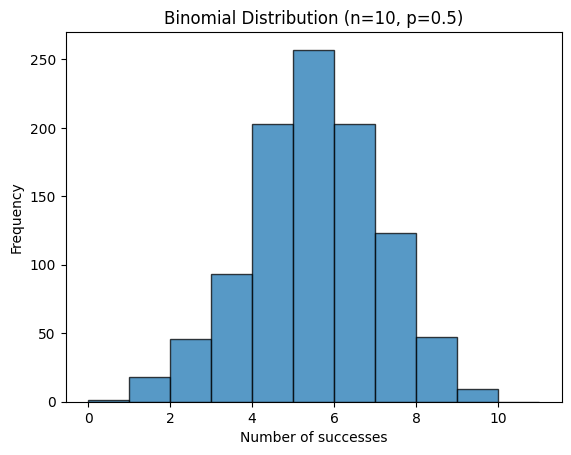

In [7]:
import numpy as np

# Parameters for the binomial distribution
n = 10    # number of trials
p = 0.5   # probability of success
size = 1000  # generate 1000 random numbers

# Generate random numbers
random_numbers = np.random.binomial(n, p, size)

# Display some of the random numbers
print(random_numbers[:10])

# Optionally visualize the distribution
import matplotlib.pyplot as plt

plt.hist(random_numbers, bins=range(n+2), alpha=0.75, edgecolor='black')
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of successes")
plt.ylabel("Frequency")
plt.show()

# has context menu

reading ab csv file


In [5]:
import pandas as pd

# Provide the file path (update with your file location)
file_path = '/content/ab_testing.csv'
import pandas as pd

# Provide the file path (update with your file location)
file_path = '/content/ab_testing.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


print(data.head())


   User ID Group  Page Views  Time Spent Conversion   Device          Location
0    14292     B           3         424         No   Mobile  Northern Ireland
1    11682     A           9         342         No   Mobile          Scotland
2    19825     A           2         396         No  Desktop  Northern Ireland
3    16080     B           4         318         No  Desktop             Wales
4    18851     A           1         338        Yes  Desktop          Scotland
   User ID Group  Page Views  Time Spent Conversion   Device          Location
0    14292     B           3         424         No   Mobile  Northern Ireland
1    11682     A           9         342         No   Mobile          Scotland
2    19825     A           2         396         No  Desktop  Northern Ireland
3    16080     B           4         318         No  Desktop             Wales
4    18851     A           1         338        Yes  Desktop          Scotland


load the data

In [8]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Step 1: Load the data
file_path = '/content/ab_testing.csv'  #  file path
data = pd.read_csv(file_path)


Inspect the data

In [9]:
print(data.head())
print(data.info())


   User ID Group  Page Views  Time Spent Conversion   Device          Location
0    14292     B           3         424         No   Mobile  Northern Ireland
1    11682     A           9         342         No   Mobile          Scotland
2    19825     A           2         396         No  Desktop  Northern Ireland
3    16080     B           4         318         No  Desktop             Wales
4    18851     A           1         338        Yes  Desktop          Scotland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB
None


 Separate data by group

In [16]:
control = data[data['User ID'] == 'Control']['Group']
treatment = data[data['User ID'] == 'Treatment']['Group']

Perform statistical test

In [17]:
t_stat, p_value = ttest_ind(control, treatment, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


Interpret results

In [18]:
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


Fail to reject the null hypothesis: No significant difference between groups.


TOTAL SINGLE CODE


In [19]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Step 1: Load the data
file_path = '/content/ab_testing.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 2: Inspect the data
print(data.head())
print(data.info())

# Example assumptions:
# 'group' column indicates 'Control' or 'Treatment'
# 'metric' column contains the outcome (continuous or binary)

# Step 3: Separate data by group
control = data[data['User ID'] == 'Control']['Group']
treatment = data[data['User ID'] == 'Treatment']['Group']

# Step 4: Perform statistical test
# For continuous outcomes: Independent t-test
t_stat, p_value = ttest_ind(control, treatment, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# For binary outcomes: Chi-squared test
if data['User ID'].nunique() == 2:  # Ensure the metric is binary
    contingency_table = pd.crosstab(data['group'], data['metric'])
    chi2, chi2_p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared Statistic: {chi2}, P-value: {chi2_p}")

# Step 5: Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


   User ID Group  Page Views  Time Spent Conversion   Device          Location
0    14292     B           3         424         No   Mobile  Northern Ireland
1    11682     A           9         342         No   Mobile          Scotland
2    19825     A           2         396         No  Desktop  Northern Ireland
3    16080     B           4         318         No  Desktop             Wales
4    18851     A           1         338        Yes  Desktop          Scotland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB
None
T-s